In [1]:
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv("winequality-white.csv", sep=";")

In [3]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
data.shape

(4898, 12)

In [6]:
X = data.iloc[:, :-1].values
X.shape

(4898, 11)

In [7]:
y = data.iloc[:,-1].values
y = y.flatten()
y.shape

(4898,)

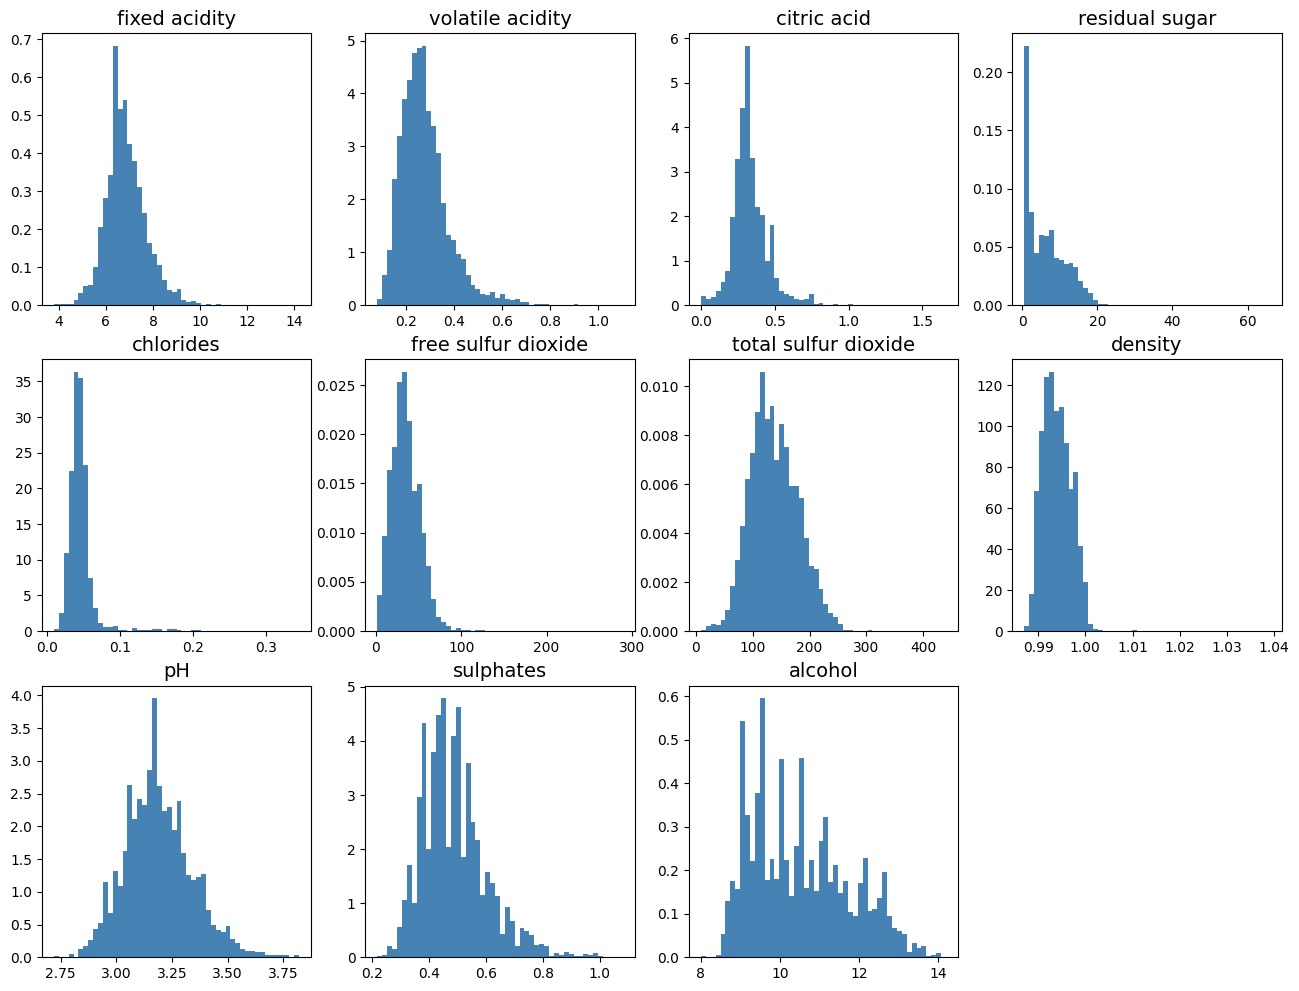

In [18]:
from sklearn import metrics
from matplotlib import pyplot as plt
import numpy as np 
fig = plt.figure(figsize=(16,12))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue',density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)

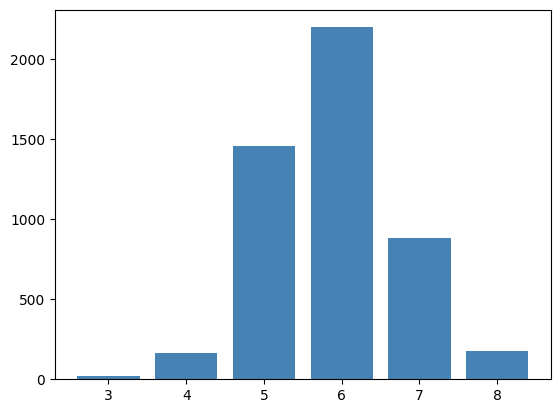

In [19]:
absc = range(np.min(y), np.max(y))
b = plt.bar(absc, [(y == a).sum() for a in absc], color="steelblue")

In [20]:
y_class = np.where(y<6,0,1)

In [21]:
y_class[y_class==1].shape

(3258,)

In [22]:
y_class[y_class==0].shape

(1640,)

In [24]:
from sklearn import model_selection

In [25]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y_class, test_size=0.3)

In [26]:
from sklearn import preprocessing

In [27]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

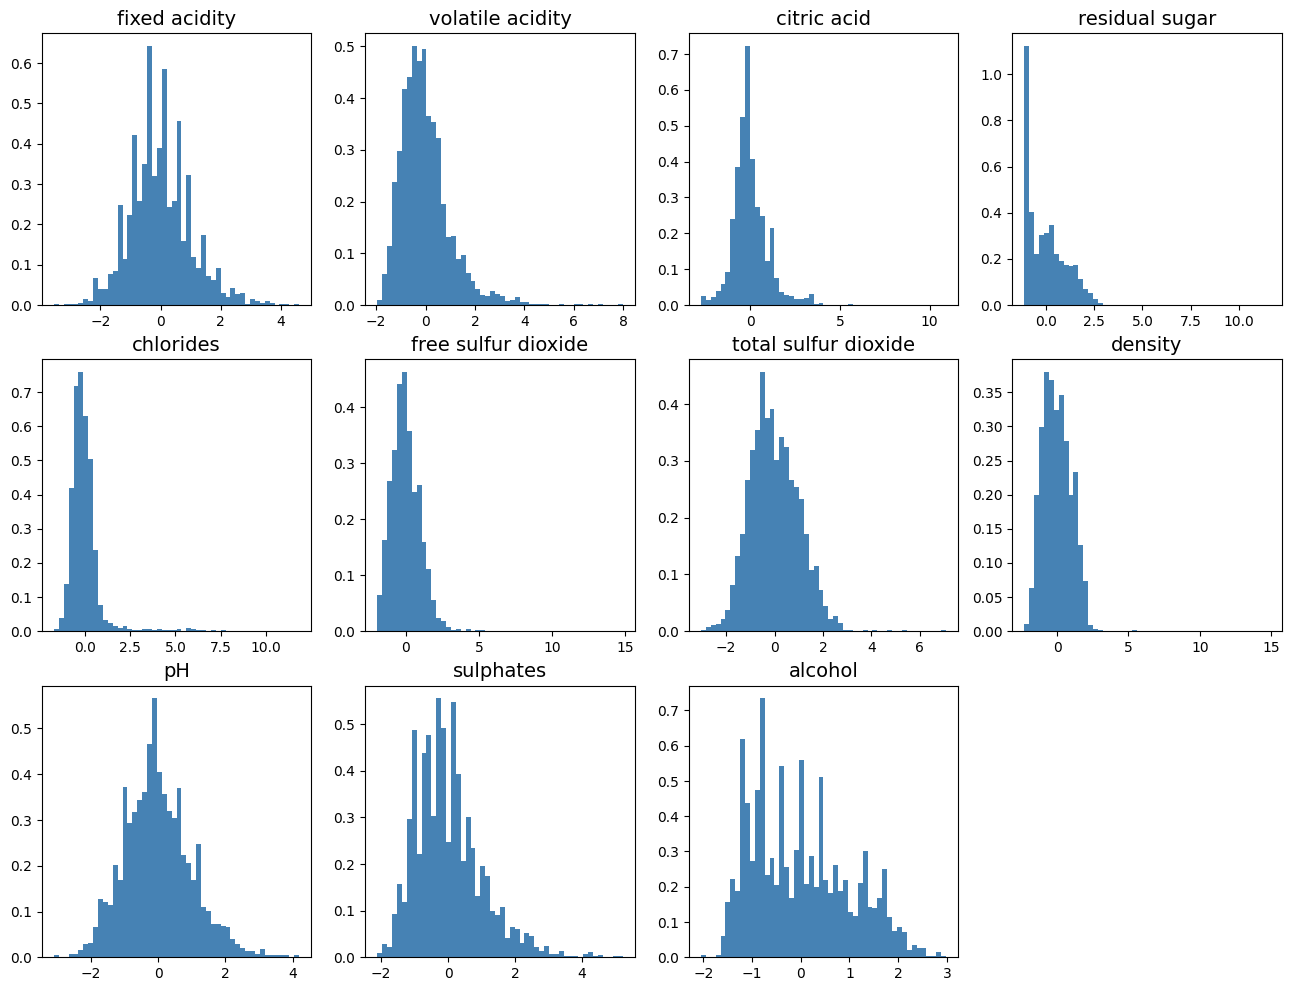

In [28]:
fig = plt.figure(figsize=(16,12))
for feat_idx in range(X_train_std.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X_train_std[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)


In [29]:
from sklearn import neighbors

In [30]:
clf = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(), 
                                   {'n_neighbors':[3,5,7,9,11,13,15]}, 
                                   cv=5, scoring='accuracy')

In [31]:
%%time
clf.fit(X_train_std, y_train)

CPU times: user 796 ms, sys: 3.36 ms, total: 800 ms
Wall time: 800 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15]},
             scoring='accuracy')

In [32]:
clf.best_params_

{'n_neighbors': 13}

In [33]:
for mean, std, params in zip(clf.cv_results_["mean_test_score"], clf.cv_results_["std_test_score"], clf.cv_results_["params"]):
    print("accuracy = %0.3f (+/-%0.3f) for %s)" % (mean,std * 2, params))

accuracy = 0.761 (+/-0.035) for {'n_neighbors': 3})
accuracy = 0.755 (+/-0.035) for {'n_neighbors': 5})
accuracy = 0.760 (+/-0.035) for {'n_neighbors': 7})
accuracy = 0.756 (+/-0.035) for {'n_neighbors': 9})
accuracy = 0.763 (+/-0.045) for {'n_neighbors': 11})
accuracy = 0.765 (+/-0.037) for {'n_neighbors': 13})
accuracy = 0.761 (+/-0.035) for {'n_neighbors': 15})


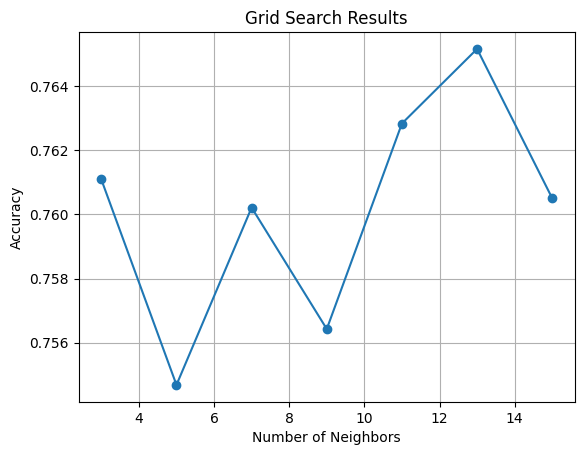

In [34]:
scores = clf.cv_results_['mean_test_score']  
n_neighbors = clf.cv_results_['param_n_neighbors'].data.astype(int)  
  
# Plot the scores as a function of n_neighbors  
plt.plot(n_neighbors, scores, marker='o')  
plt.xlabel('Number of Neighbors')  
plt.ylabel('Accuracy')  
plt.title('Grid Search Results')  
plt.grid(True)  
plt.show()  

In [35]:
y_pred = clf.predict(X_test_std)

In [36]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.753061224489796


## Manual implementation

In [37]:
best_score = 0  
best_params = {}

params = []
accuracies = []

hyperparameters = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}  
  
for k in hyperparameters['n_neighbors']:  
    model = neighbors.KNeighborsClassifier(n_neighbors=k)  
    model.fit(X_train_std, y_train)  
    score = model.score(X_test_std, y_test)  

    # Store the hyperparameter value and corresponding accuracy  
    params.append(k)
    accuracies.append(score)
  
    
    if score > best_score:  
        best_score = score  
        best_params = {'n_neighbors': k}

for param, accuracy in zip(params, accuracies):  
    print("n_neighbors: {}, Accuracy: {:.2f}".format(param, accuracy))  

n_neighbors: 3, Accuracy: 0.76
n_neighbors: 5, Accuracy: 0.76
n_neighbors: 7, Accuracy: 0.75
n_neighbors: 9, Accuracy: 0.75
n_neighbors: 11, Accuracy: 0.74
n_neighbors: 13, Accuracy: 0.75
n_neighbors: 15, Accuracy: 0.76


In [38]:
best_params

{'n_neighbors': 3}

Text(0, 0.5, 'Sensibilite')

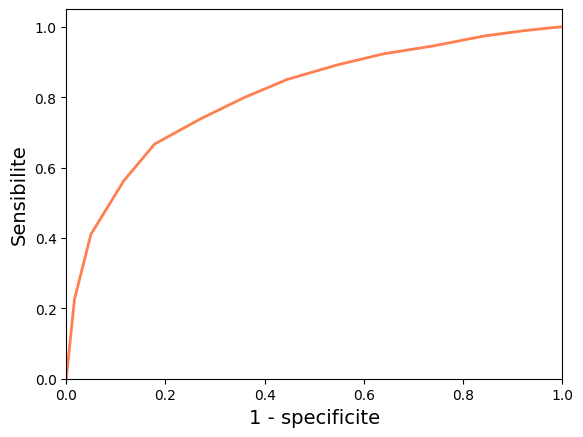

In [39]:
y_pred_proba = clf.predict_proba(X_test_std)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

In [40]:
# indice du premier seuil pour lequel
# la sensibilité est supérieure à 0.95
idx = np.min(np.where(tpr > 0.95)) 

print("Sensibilité : {:.2f}".format(tpr[idx]))
print("Spécificité : {:.2f}".format(1-fpr[idx]))
print("Seuil : {:.2f}".format(thr[idx]))

Sensibilité : 0.97
Spécificité : 0.16
Seuil : 0.23
